In [73]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_profiling
import re

import seaborn as sns
import matplotlib.pyplot as plt


from IPython.core.display import display, HTML
pd.set_option('display.max_colwidth', -1) #for all data of df to be seen

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.5)

In [87]:
# Custome functions

def wrap(text, num_of_words=3):
    new_list = []
    
    for i, w in enumerate(text.split(" ")):
        if(i % num_of_words == (num_of_words-1)):
            new_list.append(w + '\n')
        else:
            new_list.append(w + ' ')
    return ''.join(new_list)

### Import responses

In [2]:
df = pd.read_excel('omni.xlsx')

In [3]:
df.shape

(160, 52)

In [4]:
df.head(2)

,Timestamp,Score,"1. How often do you shop online technology products (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) ?","2. How often do you shop through physical stores (offline) technology products (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) ?","3. Monthly expenditure on buying technology products (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) via physical or online stores?","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse online for the best price / reviews]","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse online and then go to the physical store in order to see the product, check prices, read comments from other users through my mobile]","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse directly in the physical store to see the product, check prices, read comments from other users through my mobile]","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse directly in the physical store to see the product and then I browse online to find the best price / reviews]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I browse online for the best price / reviews and finally buy online]",...,"9. When a retailer has a seamless shopping experience across both online and offline channels (ex. everything about the retailer feels interconnected and obvious), then I choose only him for my purchases on technology products.",10. I would suggest to a friend to buy a technology product based on my overall perception of the experience quality (both offline and online) provided by the retailer ?,"11. It would be easier for me to choose and buy a technology product through a physical store if the latter has applied online practices and technologies inside the physical store. (ex. mobile payments/apps, self-service assisting technologies, product electronic search & map navigation to them)",12. Age ?,13. Gender ?,14. Marital Status ?,15. Occupation ?,16. Educational background ?,17. Annually income ?,18. Place you live ?
0,2018-04-23 00:28:57.044,1,Once a month,Once a month,51€ - 150 €,Agree strongly,Agree strongly,Agree strongly,Disagree,Agree,...,9,9,9,Millennial: 23 - 37,Female,Married with children,Employee,Master / PhD,10.001-15.000,Greece: city
1,2018-04-23 17:36:53.945,1,Rarely,Every few months,below 50 €,Agree strongly,Agree,Neither agree nor disagree,Disagree strongly,Agree,...,8,9,4,Millennial: 23 - 37,Female,Unmarried,Student,Master / PhD,below 10.000,Greece: suburb


Lets rename the columns

In [5]:
new_columns = ['Timestamp', 'Score', '01_online_freq_shop', '02_physical_freq_shop', '03_Monthly_tech_spend', 
        '04_search_online_best_price', '04_online_then_physical', '04_gather_info_via_mobile', '04_offline_then_online', 
        '05_online_for_best_price', '05_search_online_buy_online', '05_search_online_buy_offline', 
        '05_search_offile_buy_offline', '05_search_offile_buy_online', '05_same_physical_store', '06_in_store_ambience', 
        '06_trials', '06_Reference', '06_instant_gratification', '06_in_store_service', '06_easy_return', '06_instore_offers', 
        '06_search_physical_buy_online', '06_buy_instore_online_price', '06_loyalty_program', '06_shopping_experience', 
        '06_avoid_online_shopping', '07_lowest_price', '07_more_brands', '07_wider_range', '07_comfort_convenience', 
        '07_trustworthy', '07_no_incidental_costs', '07_easy_return', '07_more_offers', '07_loyalty_points', 
        '07_recommender_systems', '07_delivery', '07_personalized promotion', '07_support_chatbox', 
        '07_averse_to_offline', '08_positive_online_experience', '09_seamless_online_offline', '10_suggest_to_friend', 
        '11_online_practices_to_offline', '12_age', '13_gender', '14_marital_status', '15_occupation', 
        '16_education', '17_annually_income', '18_residence']

In [25]:
remane_col = {k: v for k, v in zip(df.columns, new_columns)}
remane_col_rev = {v: k for k, v in zip(df.columns, new_columns)}

In [7]:
df2 = df.rename(columns=remane_col)
df2.head()

,Timestamp,Score,01_online_freq_shop,02_physical_freq_shop,03_Monthly_tech_spend,04_search_online_best_price,04_online_then_physical,04_gather_info_via_mobile,04_offline_then_online,05_online_for_best_price,...,09_seamless_online_offline,10_suggest_to_friend,11_online_practices_to_offline,12_age,13_gender,14_marital_status,15_occupation,16_education,17_annually_income,18_residence
0,2018-04-23 00:28:57.044,1,Once a month,Once a month,51€ - 150 €,Agree strongly,Agree strongly,Agree strongly,Disagree,Agree,...,9,9,9,Millennial: 23 - 37,Female,Married with children,Employee,Master / PhD,10.001-15.000,Greece: city
1,2018-04-23 17:36:53.945,1,Rarely,Every few months,below 50 €,Agree strongly,Agree,Neither agree nor disagree,Disagree strongly,Agree,...,8,9,4,Millennial: 23 - 37,Female,Unmarried,Student,Master / PhD,below 10.000,Greece: suburb
2,2018-04-23 17:44:55.730,1,Rarely,Every few months,151€ - 250 €,Agree,Agree,Agree strongly,Agree,Neither agree nor disagree,...,8,8,6,Millennial: 23 - 37,Female,Unmarried,Self employed / Freelancer,Bachelor,below 10.000,Greece: city
3,2018-04-23 17:54:28.586,0,Every few months,Every few months,below 50 €,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,...,8,8,8,Generation X : 38 - 57,Male,Married,Employee,Master / PhD,10.001-15.000,Greece: city
4,2018-04-23 18:28:31.691,1,Rarely,Rarely,below 50 €,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,...,4,7,8,Millennial: 23 - 37,Female,Unmarried,Self employed / Freelancer,Master / PhD,10.001-15.000,Greece: city


In [8]:
# df.rename(columns=remane_col).info()

### Convert to categorical

In [98]:
df2['17_annually_income'] = pd.Categorical(list(df2['17_annually_income']), 
                            categories=['below 10.000', '10.001-15.000', '15.001-25.000', '25.000 +'])

### Οverview of responses

In [9]:
pandas_profiling.ProfileReport(df, check_correlation=False)

Number of variables,52
Number of observations,160
Total Missing (%),0.0%
Total size in memory,65.1 KiB
Average record size in memory,416.5 B
Numeric,4
Categorical,46
Boolean,1
Date,1
Text (Unique),0
Rejected,0


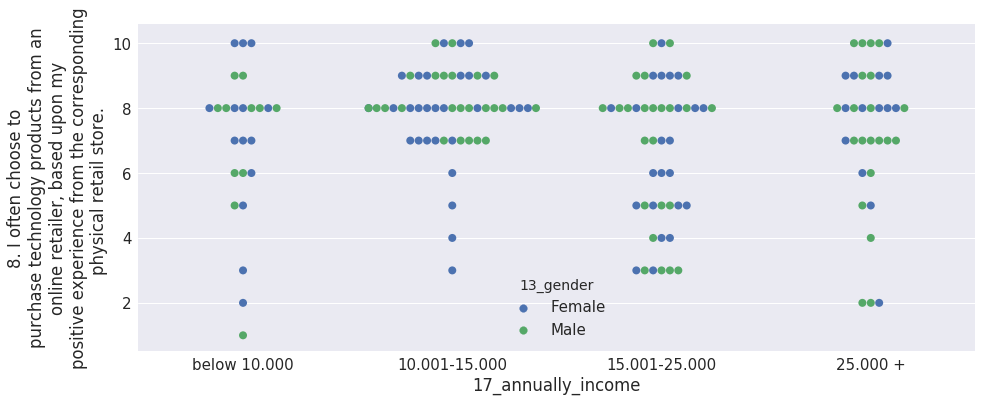

In [99]:
plt.figure(figsize=(15,6))
pl = sns.swarmplot(x="17_annually_income", y="08_positive_online_experience", data=df2, hue='13_gender', size=8)
pl.set( ylabel=wrap(remane_col_rev['08_positive_online_experience'], 5));